In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn import model_selection
%matplotlib inline

## Data Preparation and Cleaning
The data will be explored in this section. We will try to find out the shape, column names, and some more features about this data. If any cleaning is required, we will do that as well (for example, in case there are any NA values in the dataset). 

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
# let us see how the data looks like
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# let us find number of rows and columns in the dataset
num_rows = df.shape[0]
num_cols = df.shape[1]

In [6]:
print(f"The number of rows in the dataset are {num_rows} and the number of columns in the dataset are {num_cols}")

The number of rows in the dataset are 500 and the number of columns in the dataset are 9


In [7]:
# let us get the list of columns
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Note that the **Serial No.** column has no significant meaning to us. Therefore, we need to drop this column. 

In [8]:
df = df.drop('Serial No.', axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# A double check just to be sure that Serial No. column is not in the dataframe
'Serial No.' not in df.columns

True

The column names for LOR AND Chance of Admit have this extra whitespace in the end that one should get rid of. This is to ensure that no errors are generated in the end and also, because the whitespace has so significant meaning.

In [10]:
df.rename(columns = {'LOR ':'LOR'}, inplace = True)
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)

In [11]:
# let us check if it worked
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
# a second check
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
# let us check the datatype of the entries of each column
for col in df.columns:
    print(f'Column {col} is of type {df[col].dtype}')

Column GRE Score is of type int64
Column TOEFL Score is of type int64
Column University Rating is of type int64
Column SOP is of type float64
Column LOR is of type float64
Column CGPA is of type float64
Column Research is of type int64
Column Chance of Admit is of type float64


In [14]:
# check if there are any NaN values
df.isnull().values.any()

False

Therefore, there are no NaN values

## Exploratory Analysis and Visualization
The idea of this section is to perform EDA on our dataset and try to get some more insights. Visualization is an important tool of data science since a picture, apart from being visually better representation conveys a lot of information. It serves a good purpose of knowing the data better, for example, scatterplots help to check positive or negative correlation and thus help us identify important features before working on a machine learning model.

In [15]:
# let us first get some more insights from the dataframe from the number perspective
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The above information helps us identify about the various statistical measures for each of the column, like mean, median (50%), quartiles, etc. 

Let us check how many students have **Research Experience**

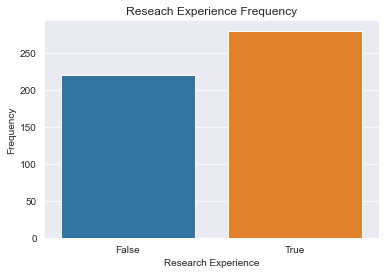

In [16]:
plt.figure()
sns.set_style('darkgrid')
sns.countplot(x='Research', data = df)
plt.title('Reseach Experience Frequency')
plt.ylabel('Frequency')
plt.xticks([0,1], ['False', 'True'])
plt.xlabel('Research Experience')
plt.show()

Thefore, majority of students in our dataset have research Experience in our dataset. Note that the difference between the number of students with and without research experience is not quite big enough.

In [17]:
research_experience_count = df['Research'].value_counts()
without_research = research_experience_count[0]
with_research = research_experience_count[1]
print(f'''The students with research experience account for {with_research/df.shape[0] * 100}%, while, the number of students
without any research experience account for {without_research/df.shape[0] * 100}% of the dataset''')

The students with research experience account for 56.00000000000001%, while, the number of students
without any research experience account for 44.0% of the dataset


Let us check the quality of universities in our dataset, basically, how many universities have the same rating.

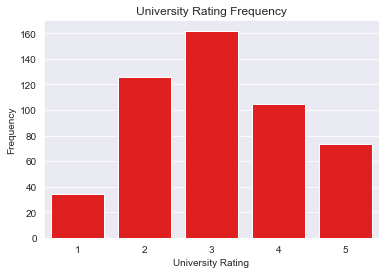

In [18]:
plt.figure()
sns.set_style('darkgrid')
sns.countplot(x ='University Rating', data = df, color = 'red') 
plt.title('University Rating Frequency')
plt.ylabel('Frequency')
plt.xlabel('University Rating')
plt.show()

Therefore, majority of the universities in our dataset have a rating of 3.

Let us check the distribution of **CGPA** in our dataset.

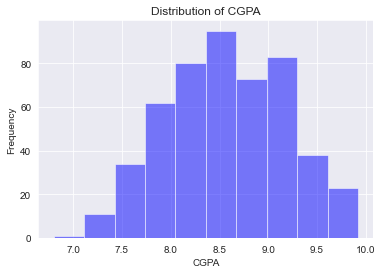

In [19]:
plt.figure()
sns.set_style('darkgrid')
plt.hist(df['CGPA'], facecolor="blue", alpha=0.5) 
plt.title('Distribution of CGPA')
plt.ylabel('Frequency')
plt.xlabel('CGPA')
plt.show()

Therefore, CGPAs are almost normally distributed but not quite exactly though.

Similarly one can check distributions for other factors like TOEFL Scores, GRE Scores, etc.

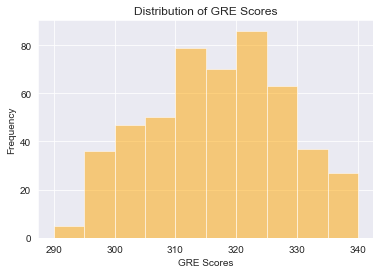

In [20]:
plt.figure()
sns.set_style('darkgrid')
plt.hist(df['GRE Score'], facecolor="orange", alpha=0.5) 
plt.title('Distribution of GRE Scores')
plt.ylabel('Frequency')
plt.xlabel('GRE Scores')
plt.show()

Note that GRE Test is out of 340 marks. Let us see how many students got 100% on it.

In [21]:
max_gre_score = df['GRE Score'].max()
max_gre_students = (df['GRE Score'] == max_gre_score).sum()
print(str(max_gre_students) + " students out of " + str(df.shape[0]) + " got a score of 100% in GRE.")

9 students out of 500 got a score of 100% in GRE.


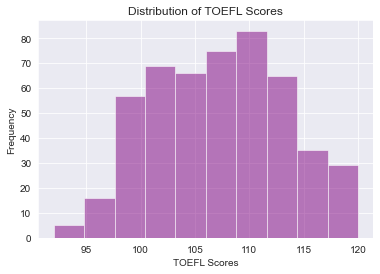

In [22]:
plt.figure()
sns.set_style('darkgrid')
plt.hist(df['TOEFL Score'], facecolor="purple", alpha=0.5) 
plt.title('Distribution of TOEFL Scores')
plt.ylabel('Frequency')
plt.xlabel('TOEFL Scores')
plt.show()

Note that TOEFL is out of 120 marks. Let us calculate how many students scored 100% in TOEFL

In [23]:
max_toefl_score = df['TOEFL Score'].max()
max_toefl_students = (df['TOEFL Score'] == max_toefl_score).sum()
print(str(max_toefl_students) + " students out of " + str(df.shape[0]) + " got a score of 100% in TOELF.")

9 students out of 500 got a score of 100% in TOELF.


## How these columns relate to each other?

### First, note that exactly 9 students have scored 100% in TOEFL as well as 9 students scored 100% in GRE. A curious mind will wonder are those the same students?

In [24]:
max_toefl_df = df[df['TOEFL Score'] == max_toefl_score]
max_score_df = max_toefl_df[max_toefl_df['GRE Score'] == max_gre_score]
max_score_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,340,120,5,4.5,4.5,9.60,1,0.94
81,340,120,4,5.0,5.0,9.50,1,0.96
143,340,120,4,4.5,4.0,9.92,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97


In [25]:
print(f'''Therefore, there are {max_score_df.shape[0]} students that have obtained in 100% in both GRE as well as TOEFL, 
while there are {max_toefl_df.shape[0] - max_score_df.shape[1]} students that have 100% in TOEFL but not 100% in GRE, and 
{max_gre_students - max_toefl_df.shape[0]} students with 100% in GRE but not 100% in TOEFL.''')

Therefore, there are 4 students that have obtained in 100% in both GRE as well as TOEFL, 
while there are 1 students that have 100% in TOEFL but not 100% in GRE, and 
0 students with 100% in GRE but not 100% in TOEFL.


### How do each of the features relate to Chances of Admission?

We shall use scatterplots to determine some more relationships between these columns. Note that, the **Chance of Admit** column is like a target variable, i.e., in ML sense, one would like to predict this based on this data. So, we shall plot scatterplots for each of the column with **Chance of Admit** on y-axis.

### GRE Score vs Chance of Admit

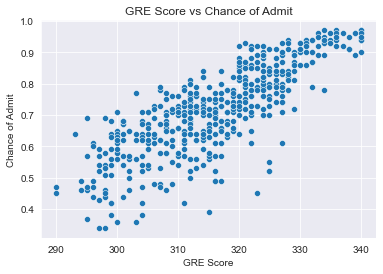

In [27]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='GRE Score', y='Chance of Admit', data = df)
plt.title('GRE Score vs Chance of Admit')
plt.show()

From the above graph, it seems like there is a positive correlation between **Chance of Admit** and **GRE Score**. One can confirm this information by computing the correlation as shown below:

In [28]:
print(f"The correlation between Chance of Admit and GRE Score is given by {df['GRE Score'].corr(df['Chance of Admit'])}")

The correlation between Chance of Admit and GRE Score is given by 0.8103506354632599


### TOEFL Score vs Chance of Admit

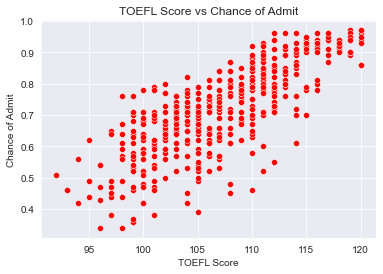

In [29]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data = df, color = 'red')
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

In [30]:
print(f"The correlation between Chance of Admit and TOEFL Score is given by {df['TOEFL Score'].corr(df['Chance of Admit'])}")

The correlation between Chance of Admit and TOEFL Score is given by 0.7922276143050826


### CGPA Score vs Chance of Admit

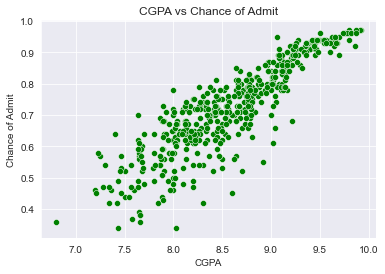

In [31]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='CGPA', y='Chance of Admit', data = df, color = 'green')
plt.title('CGPA vs Chance of Admit')
plt.show()

In [32]:
print(f"The correlation between Chance of Admit and CGPA is given by {df['CGPA'].corr(df['Chance of Admit'])}")

The correlation between Chance of Admit and CGPA is given by 0.8824125749045741


### University Rating vs Chance of Admit

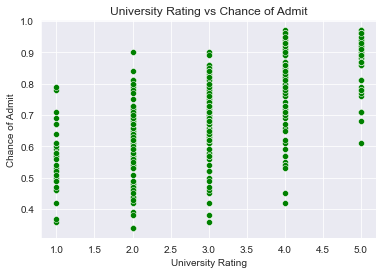

In [33]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='University Rating', y='Chance of Admit', data = df, color = 'green')
plt.title('University Rating vs Chance of Admit')
plt.show()

In [34]:
print(f"The correlation between Chance of Admit and University Rating is given by {df['University Rating'].corr(df['Chance of Admit'])}")

The correlation between Chance of Admit and University Rating is given by 0.6901323687886886


Seems like even though **University Rating** and **Chance of Admit** have positive correlation, **CGPA, TOEFL Score and GRE Score** play a much bigger role in your chances of admission. Let us check other factors as well.

###  SOP vs Chance of Admit

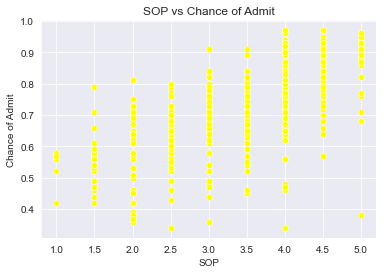

In [36]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='SOP', y='Chance of Admit', data = df, color = 'yellow')
plt.title('SOP vs Chance of Admit')
plt.show()

In [37]:
print(f"The correlation between Chance of Admit and SOP is given by {df['SOP'].corr(df['Chance of Admit'])}")

The correlation between Chance of Admit and SOP is given by 0.6841365241316721


### LOR vs Chance of Admit 

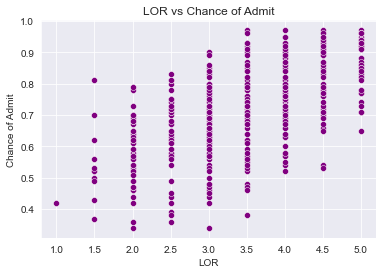

In [38]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='LOR', y='Chance of Admit', data = df, color = 'purple')
plt.title('LOR vs Chance of Admit')
plt.show()

In [39]:
print(f"The correlation between Chance of Admit and LOR is given by {df['LOR'].corr(df['Chance of Admit'])}")

The correlation between Chance of Admit and LOR is given by 0.6453645135280106


### Research vs Chance of Admit

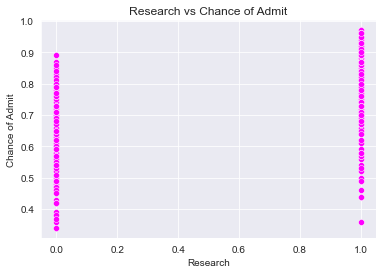

In [40]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='Research', y='Chance of Admit', data = df, color = 'magenta')
plt.title('Research vs Chance of Admit')
plt.show()

In [41]:
print(f"The correlation between Chance of Admit and Research is given by {df['Research'].corr(df['Chance of Admit'])}")

The correlation between Chance of Admit and Research is given by 0.545871029471138


Seems like the smallest factor is played by **Research** as compared to other factors.

### How do all the columns relate to each other and what can you infer from their relations?

Another way one can get a visual representation regarding correlation for all the columns is a heatmap plot, which is shown below:

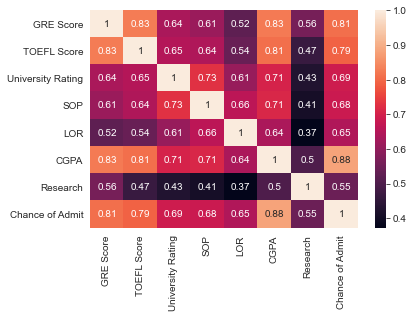

In [42]:
corr_matrix = df.corr()
# plot the heatmap and annotate it
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns, yticklabels = corr_matrix.columns, annot = True)

From above heatmap plot, one concludes the following:
<ul>
    <li>Students with higher TOEFL Scores tend to have higher GRE Scores (since their correlation is 0.83).</li>
    <li>Students with better CGPA tend to have higher TOEFL and GRE Scores.</li>
    <li>Most important factor for chance of admission is CGPA followed by GRE Score and TOEFL Score</li>
</ul>

### Simple Multi-Linear Regression Model that predicts chance of admission

In [43]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 7].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred = multi_reg.predict(X_test)

Let us see how our model performs by calculating the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [46]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print(f'The Mean Squared Error is {MSE} and the Root Mean Squared Error is {RMSE}.')

The Mean Squared Error is 0.003704655398788398 and the Root Mean Squared Error is 0.06086588041578301.


Thus, the model predicts correct output about 94% of the times (based on RMSE). One would like to know if splitting it in a certain fashion had anything to do with less error. So, we perform cross validation to make sure there is no bias. 

In [47]:
# Number of folds for the cross fold validtion test
folds_count = 5

# To make the cross validation test results reproducable
seed = 7

kfold = model_selection.KFold(n_splits = folds_count, shuffle = True, random_state = seed)

kfold_model = LinearRegression()

# Target function to maximize comparing predictions to actual values: maximizing -MSE means minimizing MSE
scoring = 'neg_mean_squared_error'

# Convert back -MSE to MSE
results = -model_selection.cross_val_score(kfold_model, X, y, cv = kfold, scoring = scoring)

# Calculate the mean and standard deviation
crossfoldMean = results.mean()
crossfoldStd = results.std()

print("Results: ", results)
print("Multiple Linear Regression Crossfold Mean: ", crossfoldMean)
print("Multiple Linear Regression Standard Deviation: ", crossfoldStd)

Results:  [0.00314138 0.00371442 0.00454563 0.00317589 0.00363385]
Multiple Linear Regression Crossfold Mean:  0.0036422349986146517
Multiple Linear Regression Standard Deviation:  0.0005078828763713514


So, based on the results above, it seems like we get about same error and accuracy. Hence, splitting has no bias on our results.

In [48]:
# so we create the final regression model

final_reg = LinearRegression()
final_reg.fit(X, y)

def print_pred(gre, toefl, rating, sop, lor, cgpa, research):
    return f"Your chances of admission are {prediction(gre, toefl, rating, sop, lor, cgpa, research) * 100}%"

def prediction(gre, toefl, rating, sop, lor, cgpa, research):
    arr = np.array([gre, toefl, rating, sop, lor, cgpa, research]).reshape(1,7)
    return final_reg.predict(arr)[0]

In [49]:
# let us test it out
print_pred(200, 118, 4,4.5, 4.5, 9.65, 1)

'Your chances of admission are 69.72676319394438%'